In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('GradientBoost&RandomForst_data.tmp')

C:\Users\mohma\AppData\Local\Temp\ipykernel_24800\2013529889.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('af1930ad-bef6-40f8-93c6-c3117a004901.tmp')


In [393]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


#### `The first things`
* ##### I will remove unrelated column that is not important to model in classifiy opeartion ,like this columns 
* Drop_column=` [ID , Customer_ID , Name , SSN , Monthly_Inhand_salary ,  Monthly_Balance,Num_of_Delayed_payment,Changed_Credit_Limit ]`,and i will remove `Month` column becouse it is a balanced column

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [395]:
Columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'Monthly_Inhand_Salary', 'Monthly_Balance','Month','Num_of_Delayed_Payment','Changed_Credit_Limit']
df.drop(columns=Columns_to_drop, inplace=True)

In [396]:
df.duplicated().sum()

np.int64(0)

#### `In the next step`
* #### I will make some feature Engineering

In [397]:
df['Type_of_Loan'].fillna('Unknown', inplace=True)

C:\Users\mohma\AppData\Local\Temp\ipykernel_24800\2490216510.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type_of_Loan'].fillna('Unknown', inplace=True)


In [398]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.strip().str.title()


In [399]:
df['Type_of_Loan'] = df['Type_of_Loan'].replace({
    'PersonalLoan': 'Personal Loan',
    'personal loan': 'Personal Loan',
    'PL': 'Personal Loan'
})


In [400]:
df["Type_of_Loan"].value_counts()

Type_of_Loan
Unknown                                                                                              11408
Not Specified                                                                                         1408
Credit-Builder Loan                                                                                   1280
Personal Loan                                                                                         1272
Debt Consolidation Loan                                                                               1264
                                                                                                     ...  
Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, And Home Equity Loan        8
Home Equity Loan, Payday Loan, Not Specified, And Personal Loan                                          8
Home Equity Loan, Auto Loan, Auto Loan, And Auto Loan                                                    8
Payday Loan, Student Loa

In [401]:
df["Credit_History_Age_years"] = df["Credit_History_Age"].astype(str).str.split(' ', expand=True)[0].astype(float)
df["Credit_History_Age_months"] = df["Credit_History_Age"].astype(str).str.split(' ', expand=True)[3].astype(float)

In [402]:
df["Credit_History_Age_years"]=df["Credit_History_Age_years"]+(df["Credit_History_Age_months"]/12)

In [403]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score,Credit_History_Age_years,Credit_History_Age_months
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,Good,22.083333,1.0
1,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,Good,NaN,NaN
2,-500,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,Good,22.250000,3.0
3,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,Good,22.333333,4.0
4,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,Good,22.416667,5.0


In [404]:
df.drop(columns=["Credit_History_Age","Credit_History_Age_months"], inplace=True)

In [405]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score,Credit_History_Age_years
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,Good,22.083333
1,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,Good,NaN
2,-500,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,Good,22.250000
3,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,Good,22.333333
4,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,Good,22.416667


#### `After that i will correct data types of columns`
* ##### to_float=`[ Age ,  Annual_Income , Num_of_Loan , Outstanding_Debt , Amount_invested_monthly ,]`

* First i will fixed all this columns before converted it

In [406]:
df["Annual_Income"].head(20)

0      19114.12
1      19114.12
2      19114.12
3      19114.12
4      19114.12
5      19114.12
6      19114.12
7      19114.12
8      34847.84
9      34847.84
10    34847.84_
11     34847.84
12     34847.84
13     34847.84
14     34847.84
15     34847.84
16    143162.64
17    143162.64
18    143162.64
19    143162.64
Name: Annual_Income, dtype: object

In [407]:
df["Annual_Income"]=df["Annual_Income"].str.strip().str.replace('_','')

In [408]:
df["Annual_Income"] = df["Annual_Income"].str.strip()

In [409]:
to_float = ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Amount_invested_monthly']

for col in to_float:
    print(f"Cleaning and converting {col} to float")
    df[col] = df[col].astype(str).str.strip().str.replace('_', '').str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')


Cleaning and converting Age to float
Cleaning and converting Annual_Income to float
Cleaning and converting Num_of_Loan to float
Cleaning and converting Outstanding_Debt to float
Cleaning and converting Amount_invested_monthly to float


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  int64  
 7   Type_of_Loan              100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Payment_of_Min_Amount     100000 non-null  ob

* #### `Now , i will handle outliers and missing value`

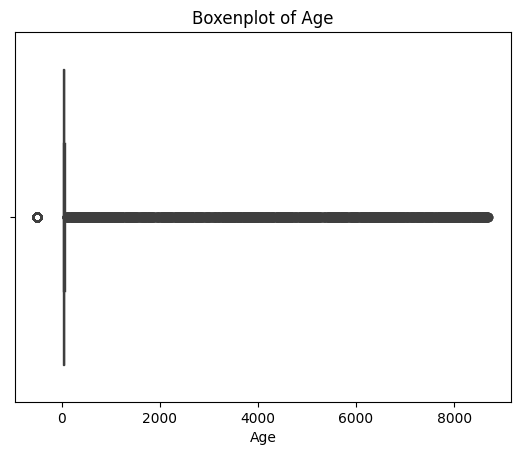

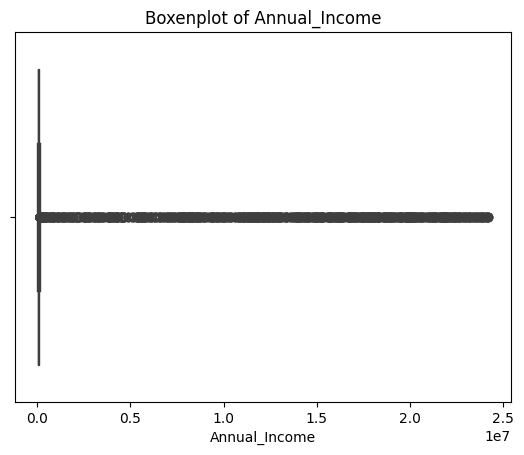

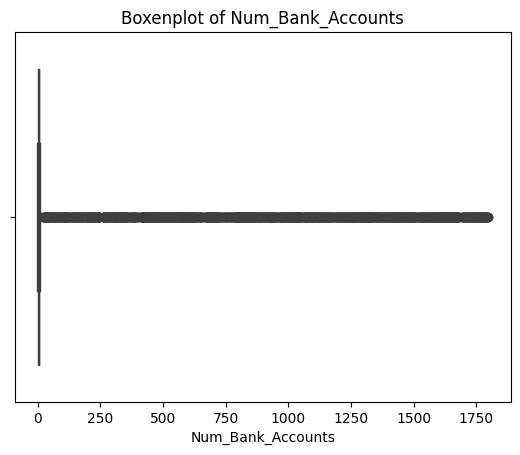

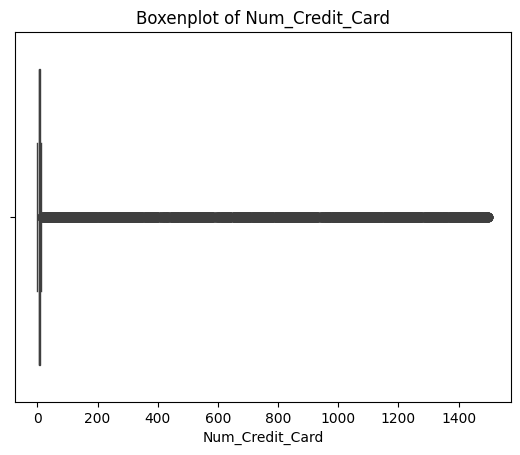

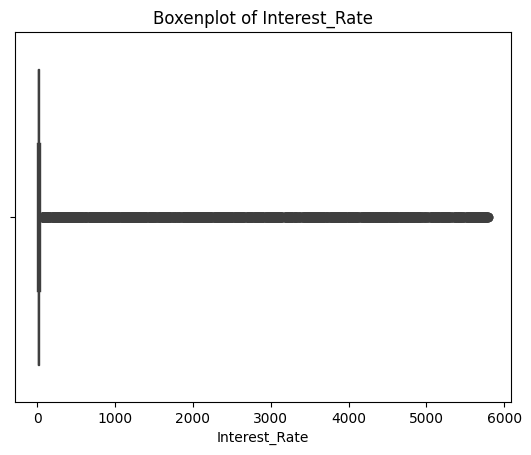

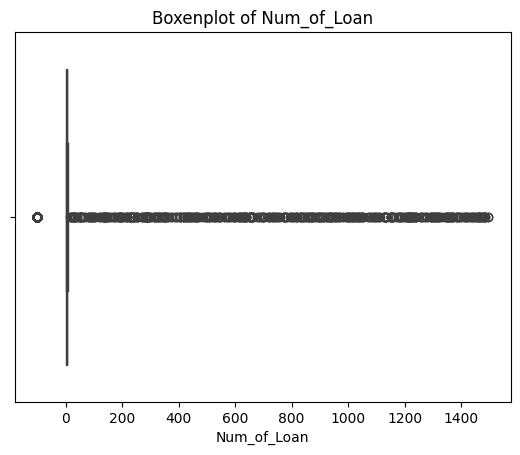

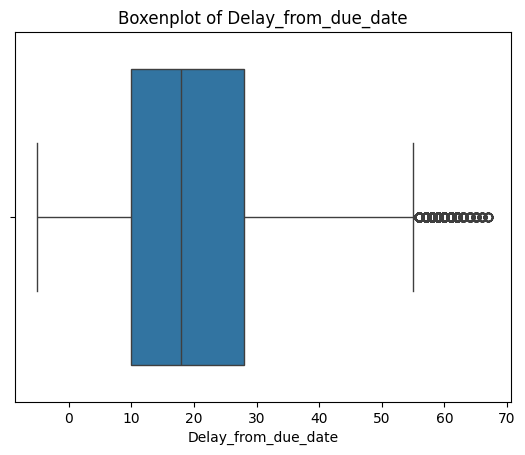

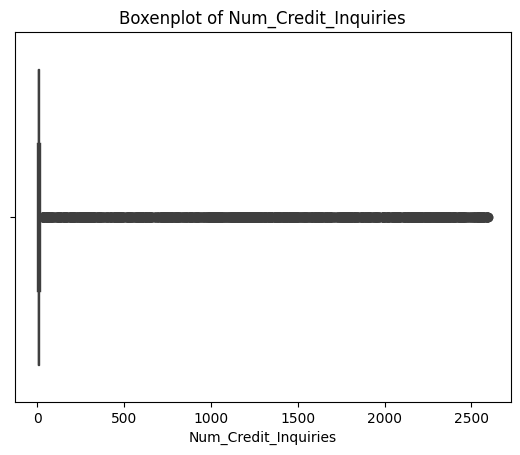

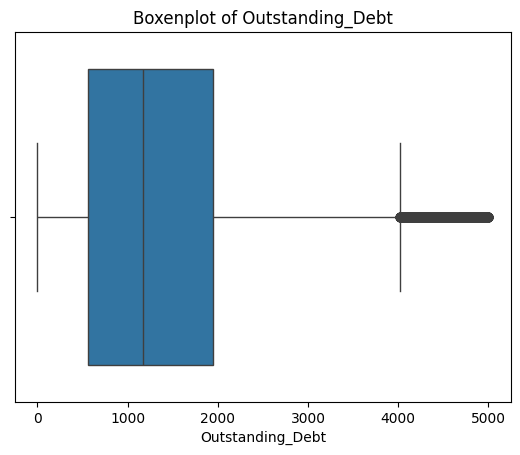

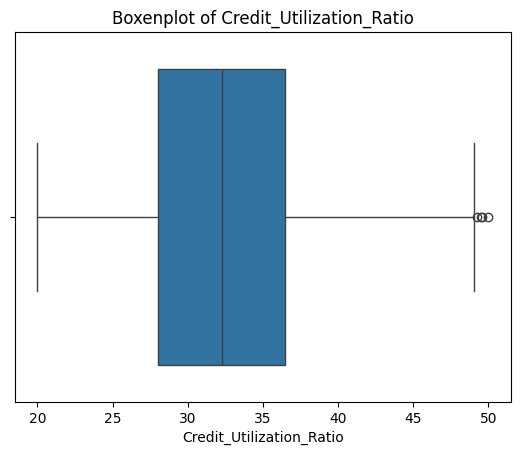

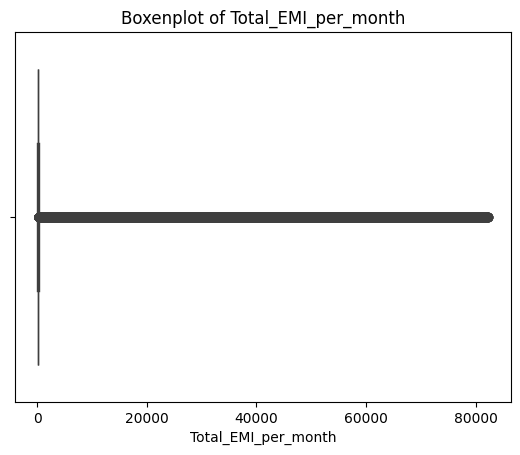

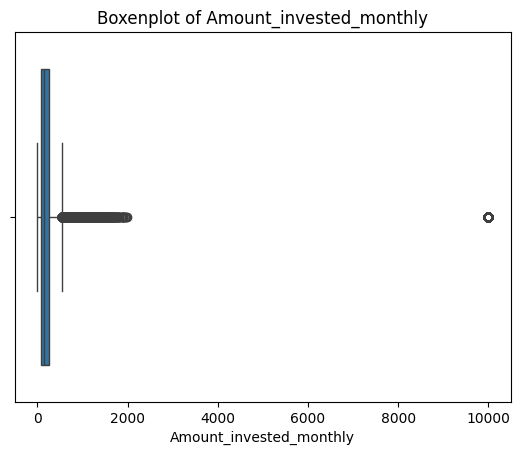

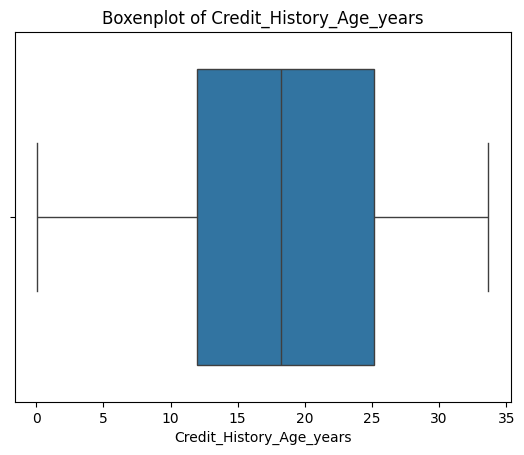

In [411]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxenplot of {col}')
    plt.show()

* ### `What is this ?!`


In [412]:
number_cols = df.select_dtypes(include=['float64', 'int64']).columns

Q1=df[number_cols].quantile(0.25)
Q3=df[number_cols].quantile(0.75)
IQR=Q3-Q1
for col in number_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

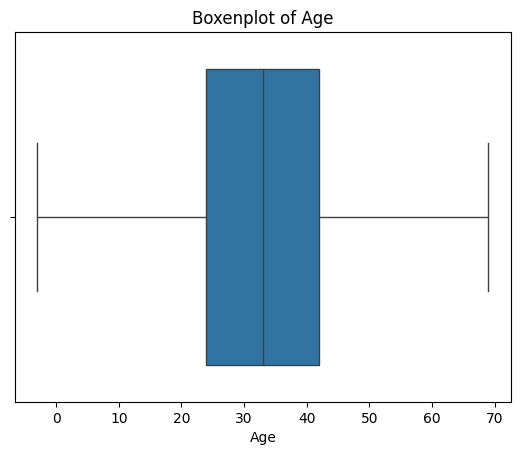

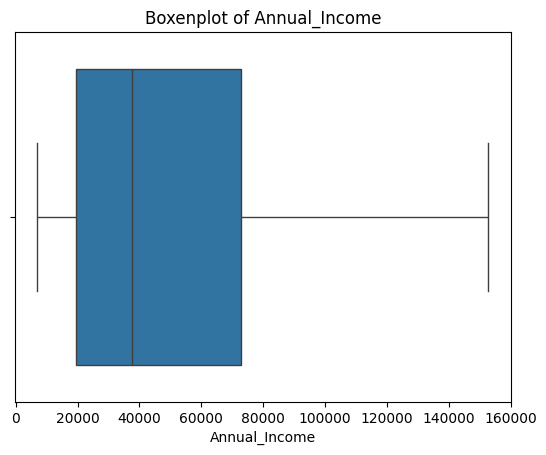

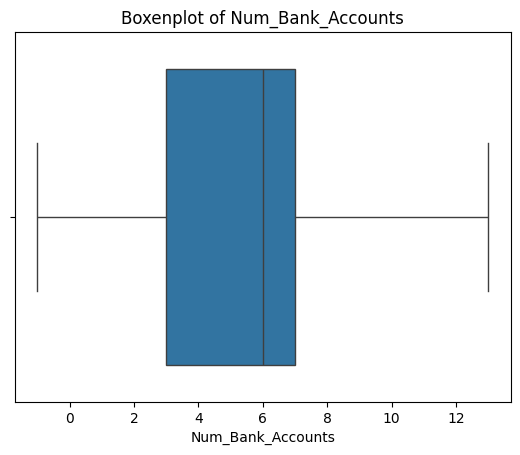

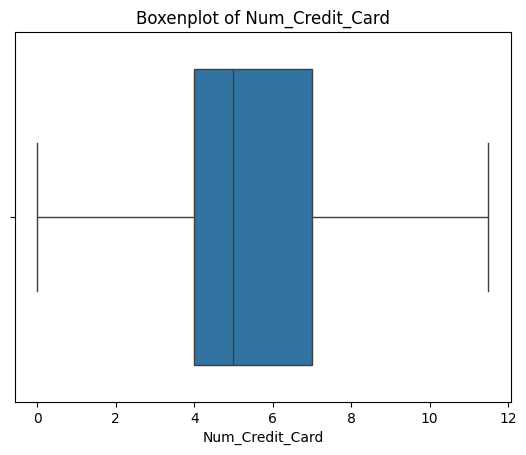

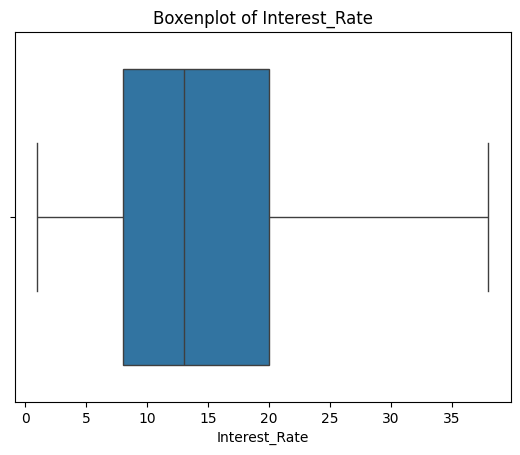

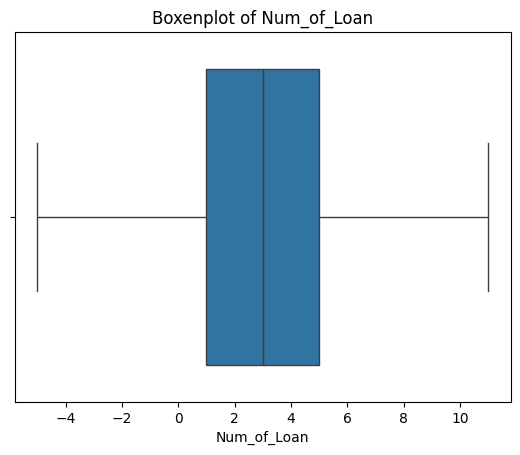

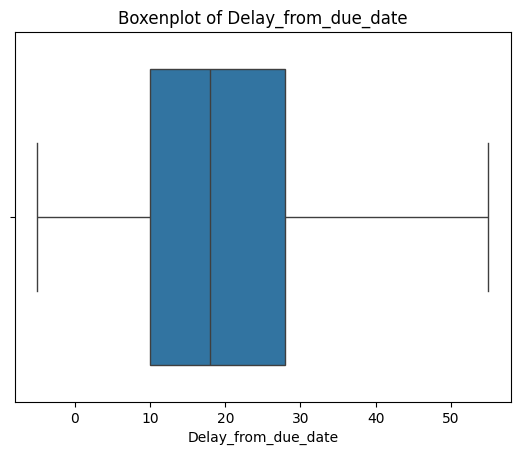

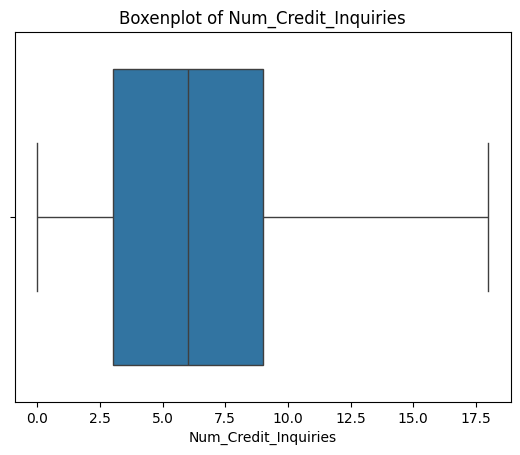

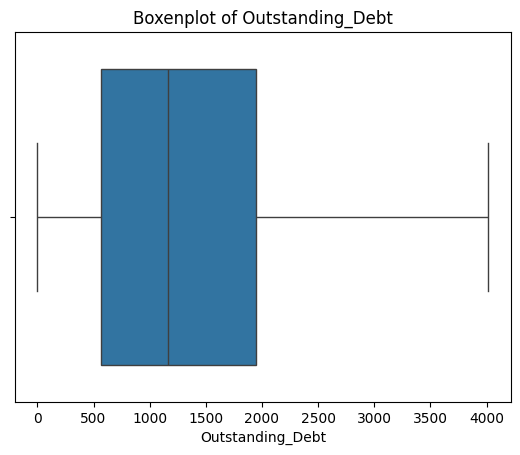

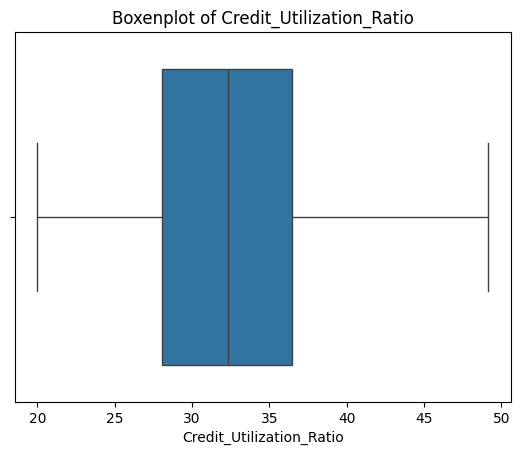

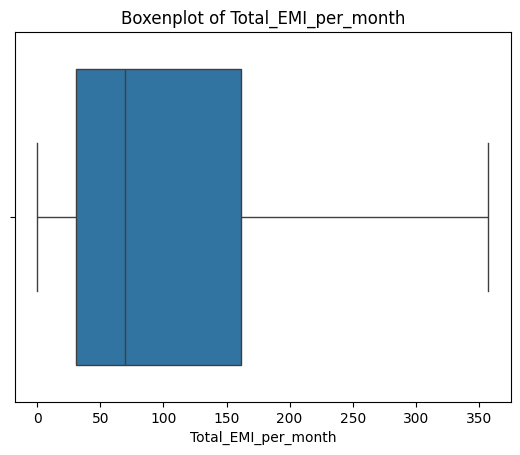

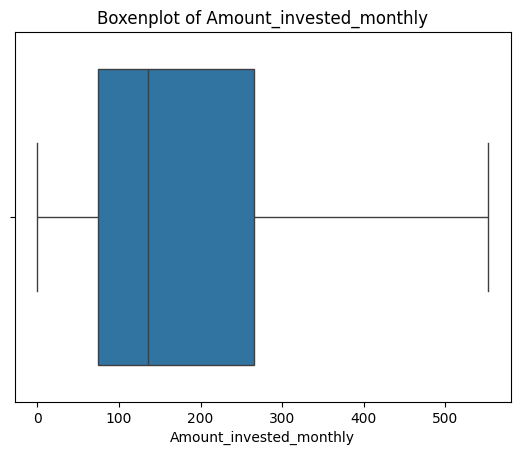

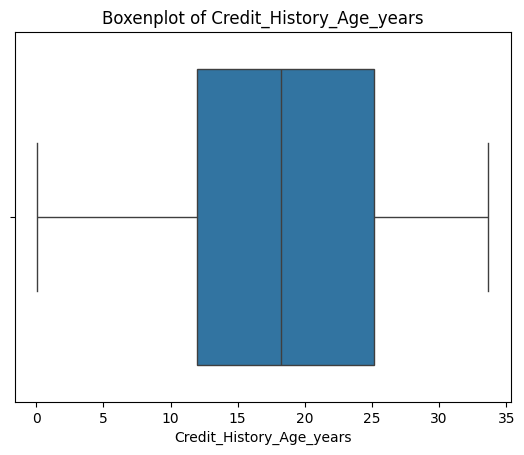

In [413]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxenplot of {col}')
    plt.show()

* ### `Nice`

In [414]:
df.shape

(100000, 19)

In [415]:
df.isna().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Credit_Score                   0
Credit_History_Age_years    9030
dtype: int64

In [416]:
df["Num_Credit_Inquiries"].fillna(df["Num_Credit_Inquiries"].median(), inplace=True)
df["Amount_invested_monthly"].fillna(df["Amount_invested_monthly"].median(), inplace=True)
df["Credit_History_Age_years"].fillna(df["Credit_History_Age_years"].median(), inplace=True)

C:\Users\mohma\AppData\Local\Temp\ipykernel_24800\280610757.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Num_Credit_Inquiries"].fillna(df["Num_Credit_Inquiries"].median(), inplace=True)
C:\Users\mohma\AppData\Local\Temp\ipykernel_24800\280610757.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [417]:
df.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Credit_Score                0
Credit_History_Age_years    0
dtype: int64

In [418]:
df.head(8)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score,Credit_History_Age_years
0,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,_,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,Good,22.083333
1,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,Good,18.250000
2,-3.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,Good,22.250000
3,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,Good,22.333333
4,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,Good,22.416667
5,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,Good,809.98,27.262259,No,49.574949,62.430172,!@9#%8,Good,22.500000
6,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,Good,22.583333
7,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,Standard,18.250000


In [419]:
df["Payment_Behaviour"].replace({"!@9#%8":"Not Specified"}, inplace=True)

C:\Users\mohma\AppData\Local\Temp\ipykernel_24800\948062092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Payment_Behaviour"].replace({"!@9#%8":"Not Specified"}, inplace=True)


In [420]:
df["Age"]=df[(df["Age"]>0) & (df["Age"]<100)]["Age"]

In [421]:
df["Credit_Mix"].replace({"_":"UNknown"}, inplace=True)

C:\Users\mohma\AppData\Local\Temp\ipykernel_24800\3170468758.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Credit_Mix"].replace({"_":"UNknown"}, inplace=True)


In [422]:
df.dropna(inplace=True,subset=['Age'])

In [423]:
df

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score,Credit_History_Age_years
0,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,UNknown,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,Good,22.083333
1,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,Good,18.250000
3,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,Good,22.333333
4,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,Good,22.416667
5,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Not Specified,Good,22.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, And Student Loan",23.0,3.0,UNknown,502.38,34.663572,No,35.104023,60.971333,High_spent_Large_value_payments,Poor,31.500000
99996,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, And Student Loan",18.0,3.0,UNknown,502.38,40.565631,No,35.104023,54.185950,High_spent_Medium_value_payments,Poor,31.583333
99997,25.0,Mechanic,39628.99,4.0,6.0,38.0,2.0,"Auto Loan, And Student Loan",27.0,3.0,Good,502.38,41.255522,No,35.104023,24.028477,High_spent_Large_value_payments,Poor,31.666667
99998,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, And Student Loan",20.0,3.0,Good,502.38,33.638208,No,35.104023,251.672582,Low_spent_Large_value_payments,Standard,31.750000


### `Very Good `

In [424]:
for col in cat_cols_onehot:
    print(df[col].value_counts())

Credit_Mix
Standard    36176
Good        24112
UNknown     20019
Bad         18807
Name: count, dtype: int64
Payment_Behaviour
Low_spent_Small_value_payments      25289
High_spent_Medium_value_payments    17397
Low_spent_Medium_value_payments     13727
High_spent_Large_value_payments     13596
High_spent_Small_value_payments     11249
Low_spent_Large_value_payments      10326
Not Specified                        7530
Name: count, dtype: int64
Occupation
_______          7001
Lawyer           6505
Architect        6303
Engineer         6295
Scientist        6238
Mechanic         6229
Accountant       6221
Media_Manager    6176
Developer        6169
Teacher          6153
Entrepreneur     6134
Journalist       6036
Doctor           6025
Manager          5932
Musician         5857
Writer           5840
Name: count, dtype: int64


In [425]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
cat_cols_label = ["Credit_Score","Payment_of_Min_Amount"]
cat_cols_onehot =["Credit_Mix","Payment_Behaviour","Occupation"]
lb=LabelEncoder()
for col in cat_cols_label:
    df[col] = lb.fit_transform(df[col])



In [426]:
df

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score,Credit_History_Age_years
0,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,UNknown,809.98,26.822620,1,49.574949,80.415295,High_spent_Small_value_payments,0,22.083333
1,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,4.0,Good,809.98,31.944960,1,49.574949,118.280222,Low_spent_Large_value_payments,0,18.250000
3,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,Good,809.98,31.377862,1,49.574949,199.458074,Low_spent_Small_value_payments,0,22.333333
4,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,Good,809.98,24.797347,1,49.574949,41.420153,High_spent_Medium_value_payments,0,22.416667
5,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,Good,809.98,27.262259,1,49.574949,62.430172,Not Specified,0,22.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, And Student Loan",23.0,3.0,UNknown,502.38,34.663572,1,35.104023,60.971333,High_spent_Large_value_payments,1,31.500000
99996,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, And Student Loan",18.0,3.0,UNknown,502.38,40.565631,1,35.104023,54.185950,High_spent_Medium_value_payments,1,31.583333
99997,25.0,Mechanic,39628.99,4.0,6.0,38.0,2.0,"Auto Loan, And Student Loan",27.0,3.0,Good,502.38,41.255522,1,35.104023,24.028477,High_spent_Large_value_payments,1,31.666667
99998,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, And Student Loan",20.0,3.0,Good,502.38,33.638208,1,35.104023,251.672582,Low_spent_Large_value_payments,2,31.750000


In [427]:
one = OneHotEncoder(sparse_output=False, drop='first')
ohe_array = one.fit_transform(df[cat_cols_onehot])
ohe_cols = one.get_feature_names_out(cat_cols_onehot)
ohe_df = pd.DataFrame(ohe_array, columns=ohe_cols)
df.reset_index(drop=True, inplace=True)
ohe_df.reset_index(drop=True, inplace=True)
df = pd.concat([df, ohe_df], axis=1)
df.drop(columns=cat_cols_onehot, inplace=True)


In [428]:
def clean_loans(x):
    if pd.isna(x):
        return []
    x = x.lower().replace("and", "").replace("  ", " ")
    items = [item.strip() for item in x.split(",") if item.strip() != ""]
    return list(set(items))

df["Loan_List"] = df["Type_of_Loan"].apply(clean_loans)
all_loans = sorted({loan for sublist in df["Loan_List"] for loan in sublist})
for loan in all_loans:
    col_name = "Loan_" + loan.replace(" ", "_")
    df[col_name] = df["Loan_List"].apply(lambda x: 1 if loan in x else 0)

df.drop(columns=["Type_of_Loan", "Loan_List"], inplace=True)


In [429]:
df

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,...,Loan_auto_loan,Loan_credit-builder_loan,Loan_debt_consolidation_loan,Loan_home_equity_loan,Loan_mortgage_loan,Loan_not_specified,Loan_payday_loan,Loan_personal_loan,Loan_student_loan,Loan_unknown
0,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,809.98,26.822620,...,1,1,0,1,0,0,0,1,0,0
1,23.0,19114.12,3.0,4.0,3.0,4.0,-1.0,4.0,809.98,31.944960,...,1,1,0,1,0,0,0,1,0,0
2,23.0,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,809.98,31.377862,...,1,1,0,1,0,0,0,1,0,0
3,23.0,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,809.98,24.797347,...,1,1,0,1,0,0,0,1,0,0
4,23.0,19114.12,3.0,4.0,3.0,4.0,8.0,4.0,809.98,27.262259,...,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99109,25.0,39628.99,4.0,6.0,7.0,2.0,23.0,3.0,502.38,34.663572,...,1,0,0,0,0,0,0,0,1,0
99110,25.0,39628.99,4.0,6.0,7.0,2.0,18.0,3.0,502.38,40.565631,...,1,0,0,0,0,0,0,0,1,0
99111,25.0,39628.99,4.0,6.0,38.0,2.0,27.0,3.0,502.38,41.255522,...,1,0,0,0,0,0,0,0,1,0
99112,25.0,39628.99,4.0,6.0,7.0,2.0,20.0,3.0,502.38,33.638208,...,1,0,0,0,0,0,0,0,1,0


In [430]:
X=df.drop(columns=['Credit_Score'])
y=df['Credit_Score']

In [431]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X, y)

In [432]:
y_train_res.value_counts()

Credit_Score
0    52716
2    52716
1    52716
Name: count, dtype: int64

In [433]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=42,stratify=y_train_res)

In [434]:
X.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,...,Loan_auto_loan,Loan_credit-builder_loan,Loan_debt_consolidation_loan,Loan_home_equity_loan,Loan_mortgage_loan,Loan_not_specified,Loan_payday_loan,Loan_personal_loan,Loan_student_loan,Loan_unknown
count,99114.000000,99114.000000,99114.000000,99114.000000,99114.000000,99114.00000,99114.000000,99114.00000,99114.000000,99114.000000,...,99114.000000,99114.000000,99114.000000,99114.000000,99114.000000,99114.000000,99114.000000,99114.000000,99114.000000,99114.000000
mean,34.002189,51268.627628,5.468582,5.670047,15.008415,3.23812,20.893224,5.98649,1399.998566,32.284429,...,0.305527,0.317432,0.310330,0.313881,0.313619,0.316595,0.319380,0.311167,0.310441,0.114040
std,11.732044,38683.533260,2.719776,2.228897,9.260814,2.95388,14.422368,4.09755,1086.292964,5.116582,...,0.460633,0.465480,0.462631,0.464071,0.463966,0.465150,0.466239,0.462973,0.462676,0.317862
min,14.000000,7005.930000,-1.000000,0.000000,1.000000,-5.00000,-5.000000,0.00000,0.230000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,19466.450000,3.000000,4.000000,8.000000,1.00000,10.000000,3.00000,566.057500,28.052221,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,37580.340000,6.000000,5.000000,13.000000,3.00000,18.000000,6.00000,1166.230000,32.305569,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,72816.480000,7.000000,7.000000,20.000000,5.00000,28.000000,9.00000,1945.680000,36.494811,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,69.000000,152791.050000,13.000000,11.500000,38.000000,11.00000,55.000000,18.00000,4015.797500,49.162808,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [435]:
from sklearn.preprocessing import StandardScaler
feater_num= X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[feater_num] = scaler.fit_transform(X_train[feater_num])
X_test[feater_num] = scaler.transform(X_test[feater_num])

In [436]:
X_train.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,...,Loan_auto_loan,Loan_credit-builder_loan,Loan_debt_consolidation_loan,Loan_home_equity_loan,Loan_mortgage_loan,Loan_not_specified,Loan_payday_loan,Loan_personal_loan,Loan_student_loan,Loan_unknown
count,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05,...,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05,1.265180e+05
mean,-2.946227e-16,2.422241e-16,-1.781439e-16,-2.933310e-16,-3.257361e-18,1.180513e-16,-3.352835e-17,2.210513e-16,8.457906e-17,-6.908132e-16,...,-9.592366e-17,2.156598e-17,-1.617448e-17,-2.487950e-17,-6.694438e-17,-1.196799e-16,-8.455098e-17,1.036739e-16,-1.550054e-17,-3.813359e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.779836e+00,-1.151475e+00,-2.247482e+00,-2.460185e+00,-1.431185e+00,-2.848445e+00,-1.717660e+00,-1.438605e+00,-1.285580e+00,-2.557448e+00,...,-6.096410e-01,-6.292111e-01,-6.173658e-01,-6.213724e-01,-6.237558e-01,-6.280976e-01,-6.300924e-01,-6.160350e-01,-6.179520e-01,-3.451423e-01
25%,-8.172340e-01,-8.308397e-01,-8.011339e-01,-6.821272e-01,-7.874878e-01,-7.451330e-01,-7.540984e-01,-7.102539e-01,-7.645596e-01,-7.968578e-01,...,-6.096410e-01,-6.292111e-01,-6.173658e-01,-6.213724e-01,-6.237558e-01,-6.280976e-01,-6.300924e-01,-6.160350e-01,-6.179520e-01,-3.451423e-01
50%,-2.965061e-02,-3.543814e-01,-7.795989e-02,-2.376127e-01,-2.510734e-01,-4.402894e-02,-2.723177e-01,-1.971096e-01,-2.067177e-01,3.427864e-03,...,-6.096410e-01,-6.292111e-01,-6.173658e-01,-6.213724e-01,-6.237558e-01,-6.280976e-01,-6.300924e-01,-6.160350e-01,-6.179520e-01,-3.451423e-01
75%,6.877470e-01,5.708109e-01,6.452141e-01,6.514164e-01,6.071897e-01,6.570752e-01,4.847662e-01,6.183105e-01,4.739382e-01,7.940061e-01,...,1.640310e+00,1.589292e+00,1.619785e+00,1.609341e+00,1.603192e+00,1.592109e+00,1.587069e+00,1.623284e+00,1.618249e+00,-3.451423e-01
max,3.033174e+00,2.516688e+00,2.814736e+00,2.651732e+00,2.538282e+00,2.760387e+00,2.411889e+00,3.030777e+00,2.502771e+00,3.498667e+00,...,1.640310e+00,1.589292e+00,1.619785e+00,1.609341e+00,1.603192e+00,1.592109e+00,1.587069e+00,1.623284e+00,1.618249e+00,2.897355e+00


In [439]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
GS_params = {
    'n_estimators': [50,70,100],
    'max_depth': [20,30],
    'min_samples_split': [5,10],
    'min_samples_leaf': [2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=GS_params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [20, 30], 'min_samples_leaf': [2, 4], 'min_samples_split': [5, 10], 'n_estimators': [50, 70, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [440]:
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
g

In [441]:
from sklearn.decomposition import PCA
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score
pca=PCA(n_components=23)
X_PCA_TRAIN = pca.fit_transform(X_train)
X_PCA_TEST = pca.transform(X_test)

In [442]:
from sklearn.metrics import classification_report, confusion_matrix
ran=dom_forest = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=5, min_samples_leaf=2, random_state=42)
ran.fit(X_PCA_TRAIN, y_train)
y_pred = ran.predict(X_PCA_TEST)
accuracy_con = confusion_matrix(y_test, y_pred)
accuracy_class=classification_report(y_test, y_pred)
print(accuracy_con)
print(accuracy_class)

[[9240  276 1027]
 [1431 7950 1162]
 [1905 2147 6492]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80     10543
           1       0.77      0.75      0.76     10543
           2       0.75      0.62      0.68     10544

    accuracy                           0.75     31630
   macro avg       0.75      0.75      0.74     31630
weighted avg       0.75      0.75      0.74     31630



In [447]:
from sklearn.ensemble import GradientBoostingClassifier   
xgb = GradientBoostingClassifier(n_estimators=100, max_depth=30, learning_rate=0.1, subsample=0.8, random_state=42)
xgb.fit(X_PCA_TRAIN, y_train)
y_pred_xgb = xgb.predict(X_PCA_TEST)
accuracy_con_xgb = confusion_matrix(y_test, y_pred_xgb)
accuracy_class_xgb=classification_report(y_test, y_pred_xgb)
print(accuracy_con_xgb)
print(accuracy_class_xgb)

[[9293  258  992]
 [1169 8150 1224]
 [1682 1982 6880]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82     10543
           1       0.78      0.77      0.78     10543
           2       0.76      0.65      0.70     10544

    accuracy                           0.77     31630
   macro avg       0.77      0.77      0.77     31630
weighted avg       0.77      0.77      0.77     31630

